## Peer Grader Guidance
Please review the student expectations for peer review grading and peer review comments.  Overall, we ask that you score with accuracy. When grading your peers, you will not only learn how to improve your future homework submissions but you will also gain deeper understanding of the concepts in the assignments. When assigning scores, consider the responses to the questions given your understanding of the problem and using the solutions as a guide. Moreover, please give partial credit for a concerted effort, but also be thorough. **Add comments to your review, particularly when deducting points, to explain why the student missed the points.** Ensure your comments are specific to questions and the student responses in the assignment.

# Background

You have been contracted as a healthcare consulting company to understand the factors on which the pricing of health insurance depends. 

## Data Description

The data consists of a data frame with 1338 observations on the following 7 variables:

1. price: Response variable ($)
2. age: Quantitative variable
3. sex: Qualitative variable
4. bmi: Quantitative variable
5. children: Quantitative variable
6. smoker: Qualitative variable
7. region: Qualitative variable

## Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`

In [1]:
insurance = read.csv("insurance.csv", head = TRUE)
head(insurance)

age,sex,bmi,children,smoker,region,price
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


# Question 1: Exploratory Data Analysis [15 points]

a. **4 pts** Create scatterplots of the response, *price*, against three quantitative predictors *age*, *bmi*, and *children*. Describe the general trend (direction and form) of each plot. It should be 3 separate scatter plots.

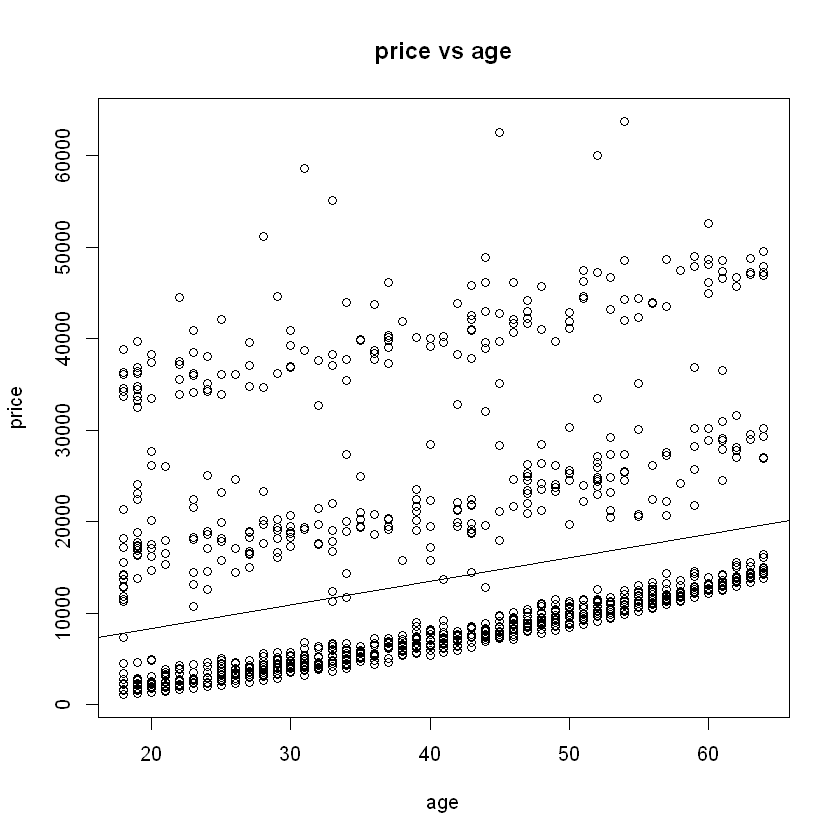

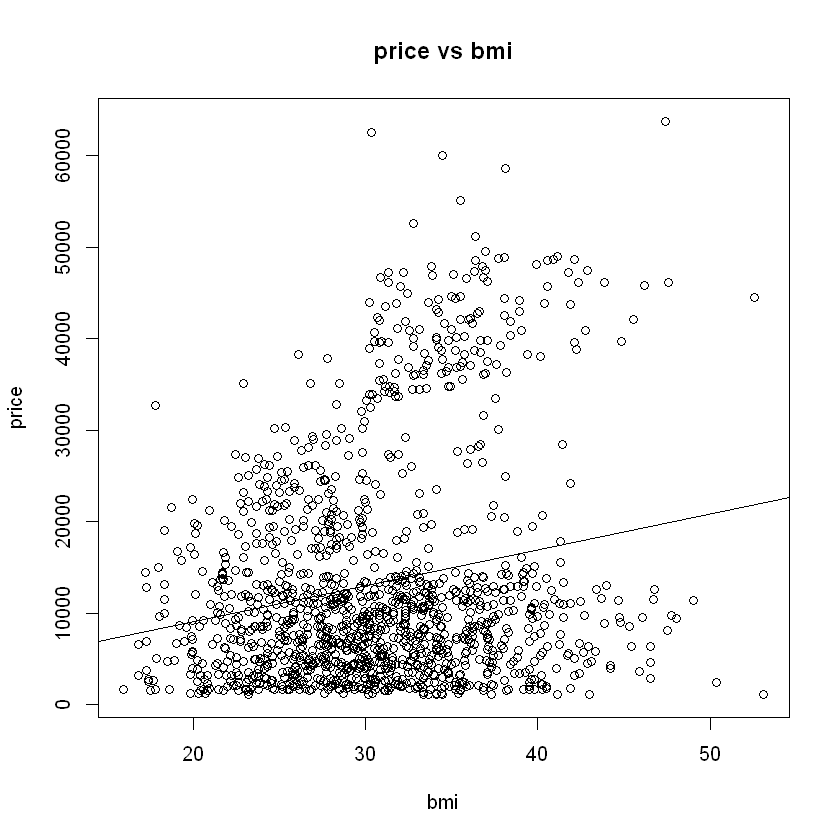

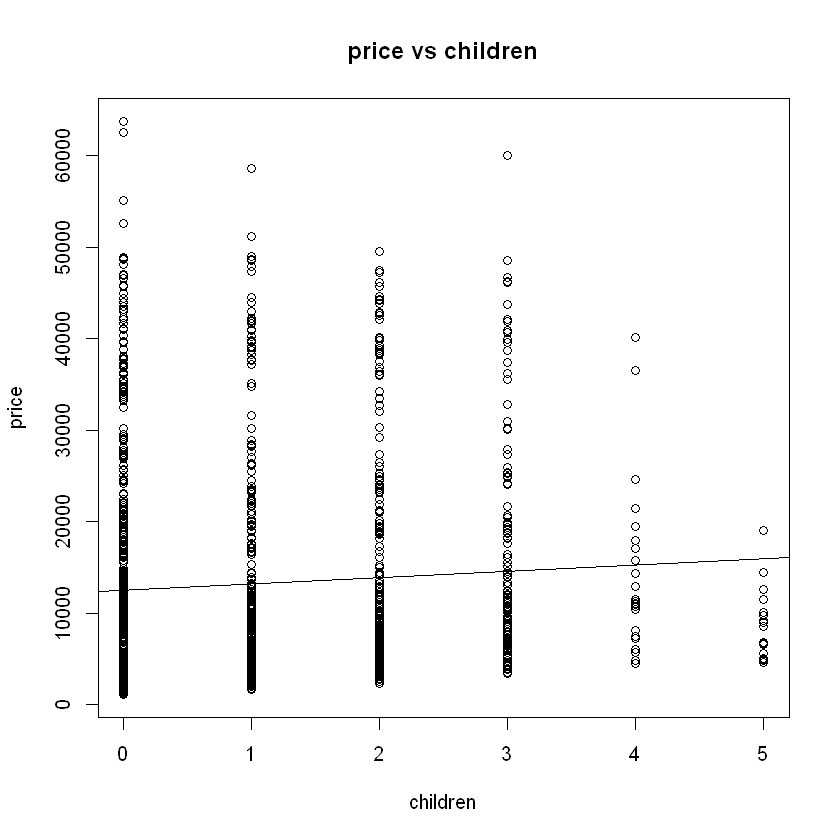

In [2]:
plot(price~age, data=insurance, main="price vs age")
abline(lm(price~age, data=insurance))

plot(price~bmi, data=insurance, main="price vs bmi")
abline(lm(price~bmi, data=insurance))

plot(price~children, data=insurance,main="price vs children")
abline(lm(price~children, data=insurance))

There's a positive linear correlation between price and age. There also appears to be the same relationship with bmi and children but it is less evident and can't be definitively determined.

b. **4 pts** What is the value of the correlation coefficient for each of the above pair of response and predictor variables? What does it tell you about your comments in part (a)?

In [3]:
cat("price/age correlation:", cor(insurance$price, insurance$age)[1], end=" ")
cat("price/bmi correlation:", cor(insurance$price, insurance$bmi)[1], end=" ")
cat("price/children correlation:", cor(insurance$price, insurance$children)[1], end=" ")

price/age correlation: 0.2990082  price/bmi correlation: 0.198341  price/children correlation: 0.06799823  

price and age have the highest correlation at ~0.3, showing a moderate positive linear relationship. 
Price and BMI have the next highest correlation at ~0.2, showing a small positive linear correlation.
Price and children have a small correlation of .068 showing very little relationship.

c. **4 pts** Create box plots of the response, *price*, and the three qualitative predictors *sex*, *smoker*, and *region*. Based on these box plots, does there appear to be a relationship between these qualitative predictors and the response?

*Hint*: Use the given code to convert the qualitative predictors to factors.

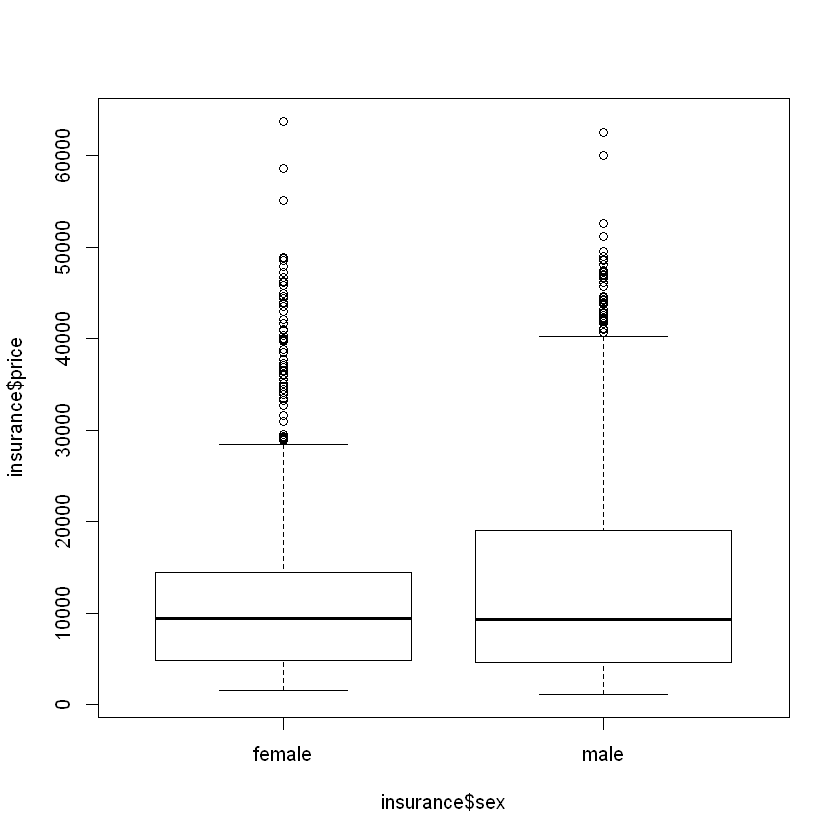

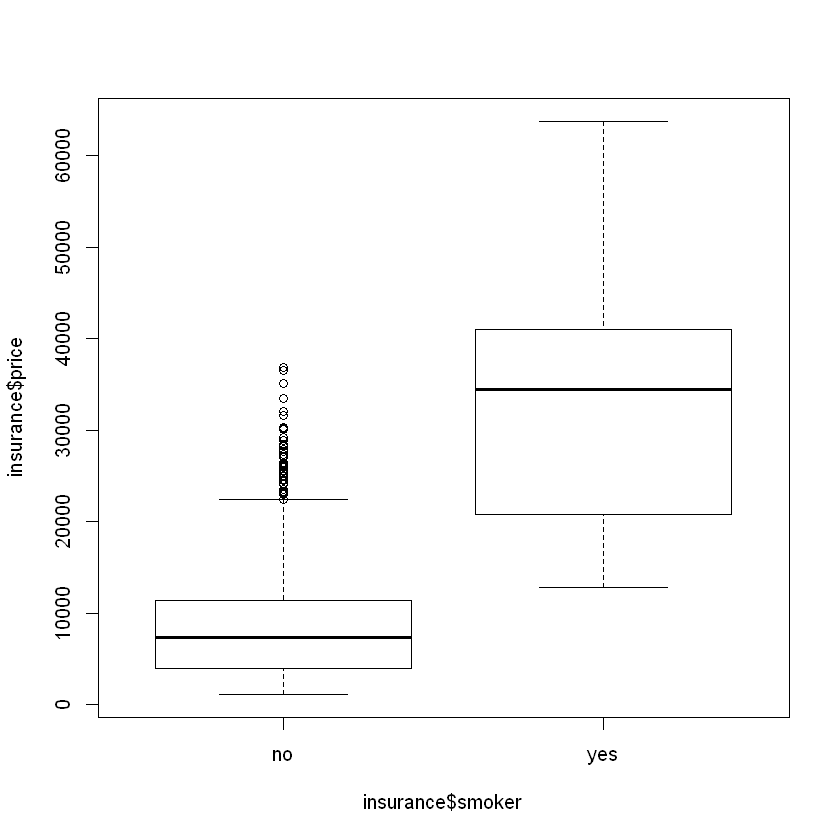

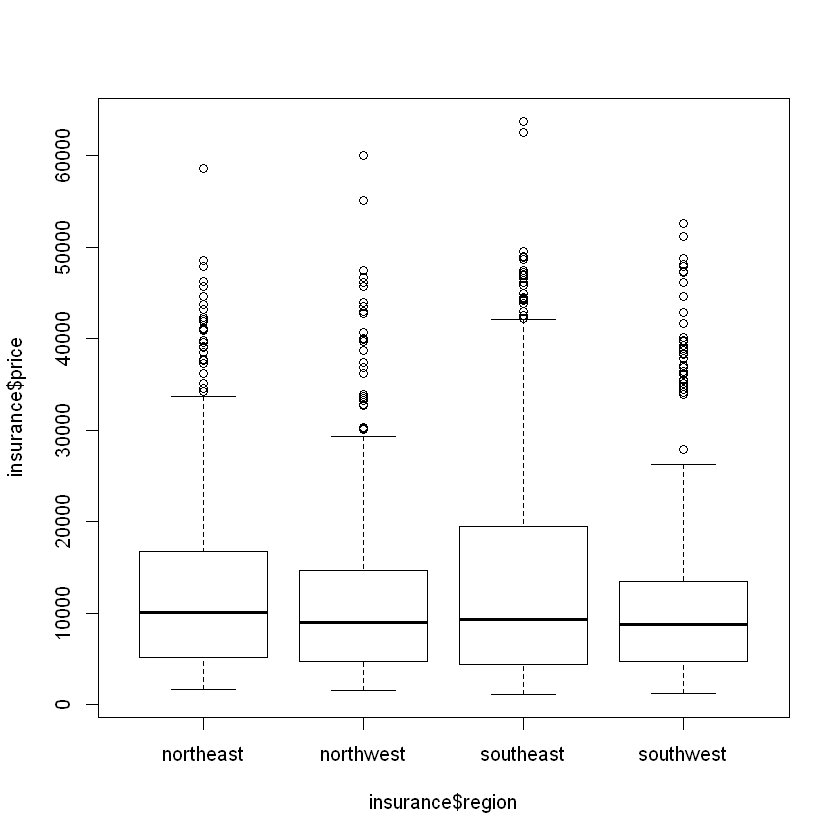

In [4]:
#make categorical variables into factors
insurance$sex<-as.factor(insurance$sex) #makes female the baseline level
insurance$smoker<-as.factor(insurance$smoker) #makes no the baseline level
insurance$region<-as.factor(insurance$region) #makes northeast the baseline level
boxplot(insurance$price ~ insurance$sex)
boxplot(insurance$price ~ insurance$smoker)
boxplot(insurance$price ~ insurance$region)

The plots above suggest prices would vary significantly between smokers and non-smokers. Not much price variation between males and females and different regions. So there seems to be a relationship between smokers but not the other predictors.

d. **3 pts** Based on the analysis above, does it make sense to run a multiple linear regression with all of the predictors?

Yes it seems reasonable. Some predictors appear to definitely have relationships and other predictors require further investigation to discover any relationships, if they exist.

# Question 2: Fitting the Multiple Linear Regression Model [12 points]

Build a multiple linear regression model, named *model1*, using the response, *price*, and all 6 predictors, and then answer the questions that follow:

a. **6 pts** Report the coefficient of determination (R-squared) for the model and give a concise interpretation of this value.

In [5]:
model1 <- lm(price ~ ., data=insurance)
summary(model1)


Call:
lm(formula = price ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


R^2 value is 0.7509 which shows that 75.09% of response variation is explained by model1's predictors.

b. **6 pts** Is the model of any use in predicting price? Using $\alpha = 0.05$, provide the following elements of the test of overall regression of the model: null hypothesis $H_0$, alternative hypothesis $H_a$, $F$-statistic or $p$-value, and conclusion.

The p-value above is 2.2e-16 which is less than the a value, we reject the null hypothesis. So, this shows the model is a good predictor of price.

# Question 3: Model Comparison [14 points]

a. **5 pts** Assuming a marginal relationship between *region* and *price*, perform an ANOVA $F$-test on the mean insurance prices among the different regions. Using an $\alpha$-level of 0.05, can we reject the null hypothesis that the means of the regions are equal? Please interpret.

In [6]:
summary(aov(insurance$price ~ insurance$region))

                   Df    Sum Sq   Mean Sq F value Pr(>F)  
insurance$region    3 1.301e+09 433586560    2.97 0.0309 *
Residuals        1334 1.948e+11 146007093                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We reject the null hypothesis due to p-value of 0.0309 being less than a value. So, the regions are each statistically significant

b. **5 pts** Now, build a second multiple linear regression model, called *model2*, using *price* as the response variable, and all variables except *region* as the predictors. Conduct a partial $F$-test comparing *model2* with *model1*. What is the partial-F test p-value? Can we reject the null hypothesis that the regression coefficients for *region* variables are zero at an $\alpha$-level of 0.05?

In [7]:
model2 = lm(price ~ .-region, data=insurance)
summary(model2)
anova(model2, model1)


Call:
lm(formula = price ~ . - region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11837.2  -2916.7   -994.2   1375.3  29565.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12052.46     951.26 -12.670  < 2e-16 ***
age            257.73      11.90  21.651  < 2e-16 ***
sexmale       -128.64     333.36  -0.386 0.699641    
bmi            322.36      27.42  11.757  < 2e-16 ***
children       474.41     137.86   3.441 0.000597 ***
smokeryes    23823.39     412.52  57.750  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6070 on 1332 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7488 
F-statistic:   798 on 5 and 1332 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1332,49072964053,NA,NA,NA,NA
1329,48839532844,3,233431209,2.117343,0.09622108


The p-value of the partial F-test is 0.09622108 which is greater than the a value. Thus, we do not reject the null hypothesis.

c. **4 pts** What can you conclude from 3a and 3b? Do they provide the exact same results?

These tests do not give the same result. Part A shows that regions are statistically significant. Part b shows that the mean of the regions may be 0.

*Note: Please use model1 for all of the following questions.*

# Question 4: Coefficient Interpretation [7 points]

a. **3 pts** Interpret the estimated coefficient of *sexmale* in the context of the problem. *Make sure female is the baseline level for sex. Mention any assumptions you make about other predictors clearly when stating the interpretation.*

In [8]:
summary(model1)


Call:
lm(formula = price ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


Bringing model1 coefficients back up, it shows that price is $131.30 cheaper for males than females. Assumption: other predictors constant

b. **4 pts** If the value of the *bmi* in *model1* is increased by 0.01 and the other predictors are kept constant, what change in the response would be expected?

Increase in price by $3.39

# Question 5: Confidence and Prediction Intervals [12 points]

a. **6 pts** Compute 90% and 95% confidence intervals (CIs) for the parameter associated with *age* for *model1*. What observations can you make about the width of these intervals?

In [9]:
confint(model1, "age", level = 0.90)
confint(model1, "age", level = 0.95)

,5 %,95 %
age,237.2708,276.4419


,2.5 %,97.5 %
age,233.5138,280.1989


The interval increases from 90 to 95% so to be more confident in the prediction. Additionally, the interval of each model is pretty tight, showing an accurate model.

b. **3 pts** Using *model1*, estimate the average price for all insurance policies with the same characteristics as the first data point in the sample. What is the 95% confidence interval? Provide an interpretation of your results.

In [10]:
newdata = insurance[1,1:6]
predict(model1, newdata, interval="confidence")

fit,lwr,upr
25293.71,24143.98,26443.44


Price estimate of $25293.71 with lower and upper bounds of 24143.98 and 26443.33, respectively. So we are 95% confident that the mean price will be between the upper and lower bounds above.

c. **3 pts** Suppose that the *age* value for the first data point is increased to 50, while all other values are kept fixed. Using *model1*, predict the price of an insurance policy with these characteristics. What is the 95% prediction interval? Provide an interpretation of your results.

In [11]:
newdata[1] = 50
predict(model1, newdata, interval="prediction")

fit,lwr,upr
33256.26,21313.29,45199.23


The price estimate is $33256.26 with much wider upper and lower bounds. This shows that there is a much wider range of prices for the model to be accurate.